<a href="https://www.kaggle.com/code/tusharaggarwal27/knn-algorithm-explained?scriptVersionId=115735456" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:2px;
           background-color:#F5DEB3;
           font-size:250%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
           🎯 🎯KNN Algorithm🎯🎯  
</p>
<style>
        h1{text-align: center;}
 </style>  
    
</div>

<p style="font-family:cursive; font-size:25px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing on other platforms.</p>


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;font-size:23px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>

<div style="color:black;
           display:fill;
           border-radius:10px;
           background-color: #ffaa00;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: left;
          color:black;">
In this notebook, I used KNN i.e.(KNeighborsClassifier), to classify if target class is 1 or o with "classified-data"(cleaned already).

 Note:I completely brewed this notebbok from cratch, if you learn anything from it please consider upvoting and cite me if sharing on other platforms.

</p>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:skyblue;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
 This dataset contains current estimates (live population clock), historical data, and projected figures of world countries and dependent territories. Data based on the latest United Nations Population Division estimates.

</p>
   

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#e71837;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Please note, I have already cleaned and placed the data as "classified-data" so that reader of this notebook can focus on builing the KKN and not distracted by the data cleaing here. In real world data will always require some sort of wrangling, to see checkout my other notebooks!
</p>



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#fc9303;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:

1. Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

2. Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

3. Non -Parametric: In KNN, there is no predefined form of the mapping function.


</p>






<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Importing the required libraries
</p>


In [1]:
# Data manipulation imports
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Importing the data file (in csv format) into the noteboobk
</p>


In [2]:
data = pd.read_csv("/kaggle/input/classified-data/Classified_Data.csv", index_col=0) 
#Data avaliable from my collection at :https://www.kaggle.com/datasets/tusharaggarwal27/classified-data

In [3]:
data.head(11)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:skyblue;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
 Standardizing the Variables because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.
</p>

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Transforming with StandardScaler
</p>

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(data.drop('TARGET CLASS', axis=1)) #Computes the mean and std to be used for scaling 

StandardScaler()

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Setting scaled_features
</p>

In [6]:
scaled_features = scaler.transform(data.drop('TARGET CLASS', axis=1)) #perform Standardization by centering and scaling

In [7]:
scaled_features #cheking

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784987],
       ...,
       [ 0.64177715, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602454, -0.85567   ],
       [-0.38765353, -0.59589427, -1.43139809, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
df = pd.DataFrame(scaled_features, columns=data.columns[:-1])
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Using Train Test Split
</p>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['TARGET CLASS'], test_size=0.33, random_state=123)

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Using KNN

Remember that we are trying to come up with a model to predict whether someone will be in the TARGET CLASS or not. We'll start with k=1.

</p>

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Building the model and fitting on traing sets
</p>

In [10]:
knn = KNeighborsClassifier(n_neighbors=1) # n_neighbors as 1

In [11]:
knn.fit(X_train, y_train) # fitting the data

KNeighborsClassifier(n_neighbors=1)

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Predicting the model on test sets 
</p>

In [12]:
y_pred= knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Predictions and Evaluations and Let's evaluate our KNN Model


</p>

In [13]:
print(confusion_matrix(y_test,y_pred))

[[142  12]
 [ 14 162]]


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       154
           1       0.93      0.92      0.93       176

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Choosing a k Value; 
Now Let's go ahead and use the elbow method to pick a good K Value:
</p>

In [15]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

In [16]:
error_rate

[0.07878787878787878,
 0.08484848484848485,
 0.06666666666666667,
 0.06363636363636363,
 0.0696969696969697,
 0.06060606060606061,
 0.05454545454545454,
 0.06060606060606061,
 0.05757575757575758,
 0.051515151515151514,
 0.05757575757575758,
 0.048484848484848485,
 0.045454545454545456,
 0.045454545454545456,
 0.048484848484848485,
 0.05454545454545454,
 0.05454545454545454,
 0.05757575757575758,
 0.05454545454545454,
 0.048484848484848485,
 0.04242424242424243,
 0.04242424242424243,
 0.04242424242424243,
 0.045454545454545456,
 0.04242424242424243,
 0.045454545454545456,
 0.04242424242424243,
 0.04242424242424243,
 0.051515151515151514,
 0.04242424242424243,
 0.05454545454545454,
 0.051515151515151514,
 0.06060606060606061,
 0.048484848484848485,
 0.05757575757575758,
 0.051515151515151514,
 0.05757575757575758,
 0.048484848484848485,
 0.06060606060606061]

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Plotting 'Error Rate vs. K Value'
</p>

Text(0, 0.5, 'Error Rate')

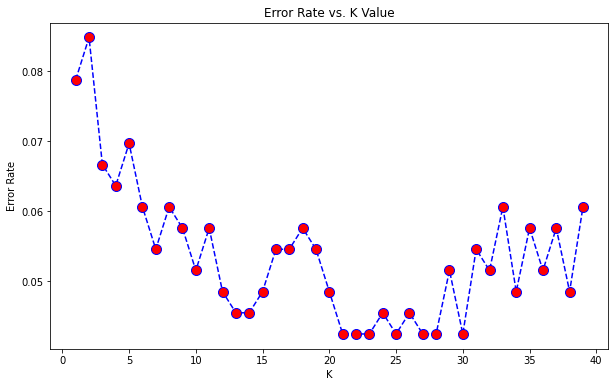

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#e71837;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Here we can see that that after around K>20 the error rate just tends to hover around 0.4 Let's retrain the model with that and check the classification report!
</p>



<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
FIRST A QUICK COMPARISON TO OUR ORIGINAL k=1
</p>

In [18]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[142  12]
 [ 14 162]]


              precision    recall  f1-score   support

           0       0.91      0.92      0.92       154
           1       0.93      0.92      0.93       176

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Now a quick COMPARISON to our new k=20
</p>

In [19]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=20


[[145   9]
 [  7 169]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       154
           1       0.95      0.96      0.95       176

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Plotting Accuracy vs K-value (i.e. no. of neighours)
</p>

In [20]:
from sklearn import metrics
accuracy=[]

for i in range(1,40):
    neigh =KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, yhat))


<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
Plotting 'accuracy vs. K Value'
</p>

Maximum accuracy:- 0.9575757575757575 at K = 20


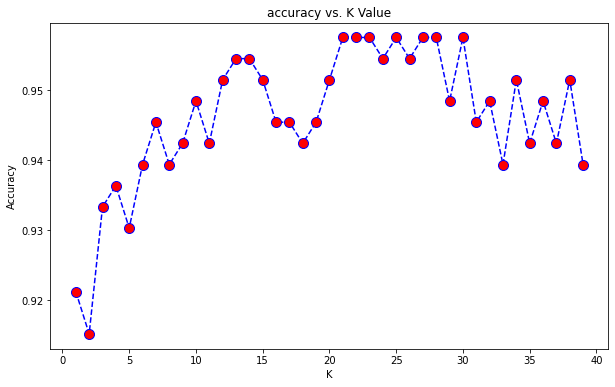

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accuracy),"at K =",accuracy.index(max(accuracy)))


<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#a5d610;
           font-size:120%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          color:black;">
We are doing something right here, 😀, as when k was one recall for 0 & 1 class was around 0.92 , but now with k=20 it's 0.96, 😀!!
</p>

<p style="font-family:cursive; font-size:25px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing on other platforms.</p>


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;font-size:23px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>